# What are the main drivers of the level of damage ? 

The goal of this part is to determine which variable explains the level of damage as an output of the damage function. To do so, we will proceed to an econometric regression of the level of damage by other explanatory variables. 

The general idea is that the quantitative level of damage given by the model is driven by multiple factors : 

- physical drivers, such as the level of climate change (temperature change, radiative forcing, etc.)
- methodological drivers, such as the choice of this or that modelling choice
- ethical drivers, such as the way spatial, social or generational equities are represented

In order to quantitatively assess the role of each factor in the model, we will perform linear regressions, in which the level of damage is assumed to be explained by a set of explanatory variables. These explanatory variables have been choosen or designed to be representative of one of the above mentionned choices. 

The general form is the following : 

$$


\begin{align*}
\text{damage} = & \ \beta_0  + \underbrace{\beta_1 \cdot \text{temperature} + \beta_2 \cdot \text{radiative forcing}}_\text{Physical variables}  + \underbrace{\beta_3 \cdot \text{equation}}_\text{Methodological variables} \\
& + \underbrace{\beta_1 \cdot \text{exponent} + \beta_2 \cdot \text{normalisation constant} + \beta_2 \cdot \text{discount rate} + \beta_2 \cdot \text{social parameter}}_\text{Ethical variables}  + \epsilon
\end{align*}

$$

where:
- $\text{damage}$ is the level of damage
- $\beta_0$ is the intercept term
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients of the variables
- $\text{exponent}, \text{normalisation constant}, \ldots, \text{temperature}$ are the independent variables
- $\epsilon$ is the error term

### Preparation of the data

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

In [2]:
# This cell stores the variables for the rest of the script, so it is easier to change if needed
data_file_path = '../../../results/batch/run_ds_17_07.nc'

First, we have to load the data that came as an output of the model. Variables of interest are stored in a netcdf file (.nc), that we will load as a dataset, and convert to a pandas dataframe. 

In [48]:
ds

<xarray.Dataset> Size: 11MB
Dimensions:                                                                (
                                                                            A MATRIX YEARS I: 15,
                                                                            AEZ I: 4,
                                                                            AGE ADULTS I: 10,
                                                                            AGE CHAIN I: 16,
                                                                            AGE CHAIN MIDDLE I: 15,
                                                                            ...
                                                                            bottom: 1,
                                                                            lower: 3,
                                                                            pprofile: 4,
                                                                            upper: 3,
                                                                            Run: 15,
                                                                            time: 46)
Coordinates: (12/255)
  * A MATRIX YEARS I                                                       (A MATRIX YEARS I) <U8 480B ...
  * AEZ I                                                                  (AEZ I) <U13 208B ...
  * AGE ADULTS I                                                           (AGE ADULTS I) <U6 240B ...
  * AGE CHAIN I                                                            (AGE CHAIN I) <U7 448B ...
  * AGE CHAIN MIDDLE I                                                     (AGE CHAIN MIDDLE I) <U6 360B ...
  * AGE CHAIN YOUNG I                                                      (AGE CHAIN YOUNG I) <U6 360B ...
    ...                                                                     ...
  * bottom                                                                 (bottom) <U6 24B ...
  * lower                                                                  (lower) <U6 72B ...
  * pprofile                                                               (pprofile) <U9 144B ...
  * upper                                                                  (upper) <U6 72B ...
  * time                                                                   (time) float64 368B ...
  * Run                                                                    (Run) int32 60B ...
Data variables: (12/173)
    define_46_eq_damage_function                                           (Run, time) float64 6kB ...
    define_tot_eq_define_total_impact                                      (Run, time, REGIONS 35 I) float64 193kB ...
    dice_5_eq_damage_function                                              (Run, time) float64 6kB ...
    dice_tot_eq_dice_total_impact                                          (Run, time, REGIONS 35 I) float64 193kB ...
    dsk_tot_eq_dsk_total_impact                                            (Run, time, REGIONS 35 I) float64 193kB ...
    extra_extra_gdp_modifyer                                               (Run, time, REGIONS 35 I) float64 193kB ...
    ...                                                                     ...
    fund_w1_tau_parameter                                                  (Run) float64 120B ...
    fund_extra_initial_revenue                                             (Run, REGIONS 35 I) float64 4kB ...
    fund_extra_initial_gdp                                                 (Run, REGIONS 35 I) float64 4kB ...
    fund_extra_initial_population                                          (Run, REGIONS 35 I) float64 4kB ...
    switch_wiliam_amoc_change                                              (Run) float64 120B ...
    witness_epsilon                                                        (Run) float64 120B ...
Attributes: (5)

In [50]:
variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_eq_total_deaths',
       'fund_tot_eq_fund_total_impact', 'fund_tot_total_damage',
       'witness_tot_eq_witness_total_impact', 'time',
       'temperature_change', 'total_population', 'extra_extra_exponent',
       'extra_extra_normalisation_constant', 'total_radiative_forcing', 'gross_domestic_product_nominal', 'population_35_regions']

damage_variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_monetary_impact', 'fund_tot_total_damage',
       'fund_tot_eq_fund_total_impact', 'witness_tot_eq_witness_total_impact']      

ds = xr.open_dataset(data_file_path)
df = ds[variables].to_dataframe().reset_index()

We now have a dataframe : 

In [27]:
df

,Run,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,gross_domestic_product_nominal
0,0,2005.0,AUSTRIA,0.000000e+00,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000e+00,0.845000,6.541007e+09,-0.891537,17578.173494,1.714491,3.786850e+05
1,0,2005.0,BELGIUM,6.648828e+02,803.179592,0.0,1.379671e+09,5.746519e+06,1.379671e+09,4.973581e+06,1.357118e+03,0.845000,6.541007e+09,-0.891537,17578.173494,1.714491,4.580816e+05
2,0,2005.0,BULGARIA,1.411905e+01,17.055837,0.0,2.799410e+08,5.009851e+01,2.799410e+08,8.615126e+05,2.881893e+01,0.845000,6.541007e+09,-0.891537,17578.173494,1.714491,4.934207e+04
3,0,2005.0,CROATIA,2.389620e+01,28.866647,0.0,2.565073e+08,2.853332e+01,2.565073e+08,1.519235e+06,4.877544e+01,0.845000,6.541007e+09,-0.891537,17578.173494,1.714491,4.937873e+04
4,0,2005.0,CYPRUS,1.872130e+01,22.615360,0.0,9.993271e+07,5.360278e+05,9.993271e+07,3.055627e+06,3.821276e+01,0.845000,6.541007e+09,-0.891537,17578.173494,1.714491,2.025158e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24145,14,2050.0,INDIA,1.449657e+04,10230.165974,0.0,1.033936e+10,2.610737e+04,1.033936e+10,1.676094e+05,1.768513e+04,2.002517,8.633636e+09,0.833429,49917.120197,3.804644,2.490399e+06
24146,14,2050.0,LATAM,9.253032e+04,65298.257236,0.0,3.080282e+10,4.219087e+03,3.080282e+10,2.094437e+06,1.128826e+05,2.002517,8.633636e+09,0.833429,49917.120197,3.804644,6.926603e+06
24147,14,2050.0,RUSSIA,1.432812e+05,101112.931838,0.0,2.248643e+10,8.288707e+02,2.248643e+10,7.054126e+06,1.747963e+05,2.002517,8.633636e+09,0.833429,49917.120197,3.804644,7.390629e+06
24148,14,2050.0,USMCA,1.246017e+06,879308.892304,0.0,1.014323e+11,4.586604e+03,1.014323e+11,1.357162e+07,1.520082e+06,2.002517,8.633636e+09,0.833429,49917.120197,3.804644,5.267627e+07


We now compute the spatial equity coefficient, which takes the form : 

$$ \text{coef} = (\frac{y_{t,r}}{y_0})^\beta $$

In [55]:
df['coef'] = ((df['gross_domestic_product_nominal']/df['population_35_regions'] )/ df['extra_extra_normalisation_constant'] ) ** df['extra_extra_exponent']
df

,Run,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,gross_domestic_product_nominal,population_35_regions,coef
0,0,2005.0,AUSTRIA,0.000000e+00,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000e+00,0.845000,6.541007e+09,-0.891537,17578.173494,1.714491,3.786850e+05,8.253656e+06,9.500745e+04
1,0,2005.0,BELGIUM,6.648828e+02,803.179592,0.0,1.379671e+09,5.746519e+06,1.379671e+09,4.973581e+06,1.357118e+03,0.845000,6.541007e+09,-0.891537,17578.173494,1.714491,4.580816e+05,1.054688e+07,9.976724e+04
2,0,2005.0,BULGARIA,1.411905e+01,17.055837,0.0,2.799410e+08,5.009851e+01,2.799410e+08,8.615126e+05,2.881893e+01,0.845000,6.541007e+09,-0.891537,17578.173494,1.714491,4.934207e+04,7.686964e+06,5.486324e+05
3,0,2005.0,CROATIA,2.389620e+01,28.866647,0.0,2.565073e+08,2.853332e+01,2.565073e+08,1.519235e+06,4.877544e+01,0.845000,6.541007e+09,-0.891537,17578.173494,1.714491,4.937873e+04,4.378066e+06,3.319231e+05
4,0,2005.0,CYPRUS,1.872130e+01,22.615360,0.0,9.993271e+07,5.360278e+05,9.993271e+07,3.055627e+06,3.821276e+01,0.845000,6.541007e+09,-0.891537,17578.173494,1.714491,2.025158e+04,1.027657e+06,2.018230e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24145,14,2050.0,INDIA,1.449657e+04,10230.165974,0.0,1.033936e+10,2.610737e+04,1.033936e+10,1.676094e+05,1.768513e+04,2.002517,8.633636e+09,0.833429,49917.120197,3.804644,2.490399e+06,1.575712e+09,5.620005e-07
24146,14,2050.0,LATAM,9.253032e+04,65298.257236,0.0,3.080282e+10,4.219087e+03,3.080282e+10,2.094437e+06,1.128826e+05,2.002517,8.633636e+09,0.833429,49917.120197,3.804644,6.926603e+06,4.072643e+08,4.071099e-06
24147,14,2050.0,RUSSIA,1.432812e+05,101112.931838,0.0,2.248643e+10,8.288707e+02,2.248643e+10,7.054126e+06,1.747963e+05,2.002517,8.633636e+09,0.833429,49917.120197,3.804644,7.390629e+06,1.411250e+08,1.039408e-05
24148,14,2050.0,USMCA,1.246017e+06,879308.892304,0.0,1.014323e+11,4.586604e+03,1.014323e+11,1.357162e+07,1.520082e+06,2.002517,8.633636e+09,0.833429,49917.120197,3.804644,5.267627e+07,4.965688e+08,1.871891e-05


<Axes: xlabel='gross_domestic_product_nominal', ylabel='population_35_regions'>

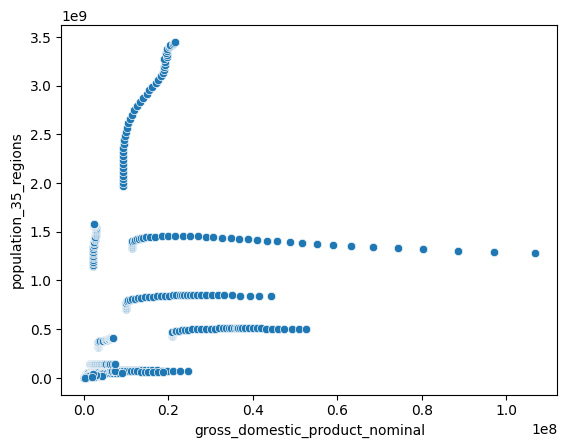

In [56]:
sns.scatterplot(data=df, x='gross_domestic_product_nominal', y='population_35_regions')

We need to have all the damages in the same column to process to the regression : 

In [31]:
df_melted = df.melt(id_vars=['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'coef'], var_name='equation',  value_vars=damage_variables, value_name='total_damage')
df_melted


,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,equation,total_damage
0,2005.0,AUSTRIA,-0.891537,17578.173494,1.714491,0.064760,define_tot_eq_define_total_impact,0.000000e+00
1,2005.0,BELGIUM,-0.891537,17578.173494,1.714491,0.054653,define_tot_eq_define_total_impact,6.648828e+02
2,2005.0,BULGARIA,-0.891537,17578.173494,1.714491,0.398450,define_tot_eq_define_total_impact,1.411905e+01
3,2005.0,CROATIA,-0.891537,17578.173494,1.714491,0.398186,define_tot_eq_define_total_impact,2.389620e+01
4,2005.0,CYPRUS,-0.891537,17578.173494,1.714491,0.881422,define_tot_eq_define_total_impact,1.872130e+01
...,...,...,...,...,...,...,...,...
169045,2050.0,INDIA,0.833429,49917.120197,3.804644,26.012265,witness_tot_eq_witness_total_impact,1.768513e+04
169046,2050.0,LATAM,0.833429,49917.120197,3.804644,61.014079,witness_tot_eq_witness_total_impact,1.128826e+05
169047,2050.0,RUSSIA,0.833429,49917.120197,3.804644,64.402142,witness_tot_eq_witness_total_impact,1.747963e+05
169048,2050.0,USMCA,0.833429,49917.120197,3.804644,330.947946,witness_tot_eq_witness_total_impact,1.520082e+06


<Axes: xlabel='time', ylabel='total_damage'>

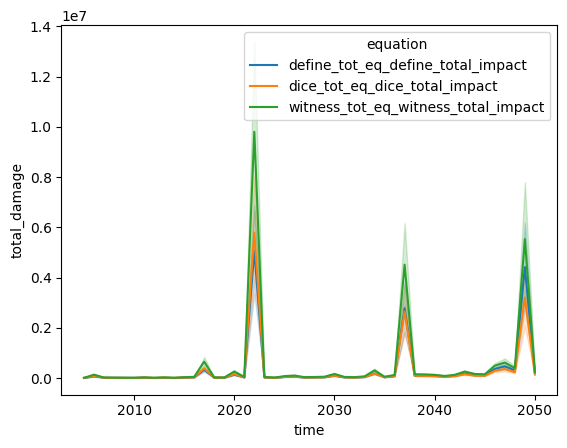

In [33]:
df_melted = df_melted[~df_melted['equation'].isin(['fund_tot_total_damage', 'fund_tot_eq_fund_total_impact', 'fund_tot_eq_monetary_impact', 'dsk_tot_eq_dsk_total_impact'])] 
sns.lineplot(data=df_melted, x='time', y='total_damage', hue='equation', legend=True, estimator='mean')

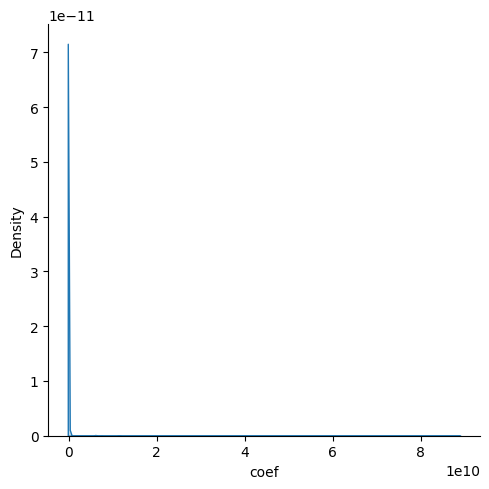

In [52]:
sns.displot(data=df_melted, x='coef', kind='kde', fill=True, common_norm=False, common_grid=True)

In [53]:
df['coef'].describe()

count    2.415000e+04
mean     1.363975e+18
std      2.074225e+20
min      1.706144e-23
25%      2.740372e-05
50%      3.156788e-01
75%      5.255459e+03
max      3.223036e+22
Name: coef, dtype: float64

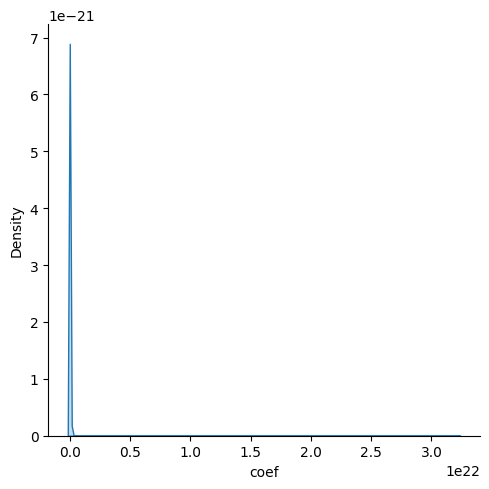

In [54]:
outliers = df[df['coef'] > 1e2]
sns.displot(data=outliers, x='coef', kind='kde', fill=True, common_norm=False, common_grid=True)

In [45]:
outliers = outliers.sort_values('coef', ascending=False)
outliers.head(10)

,Run,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_monetary_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,gross_domestic_product_nominal,coef
11478,7,2010.0,USMCA,6.752740e+04,8.081282e+04,0.0,6.834983e+10,3.318372e+03,6.834983e+10,6.379057e+06,1.365905e+05,0.956432,6.914849e+09,3.340998,11049.916074,1.985996,2.091227e+07,8.883666e+10
11473,7,2010.0,CHINA,4.221436e+03,5.051965e+03,0.0,6.852279e+10,9.981435e+03,6.852279e+10,1.266136e+06,8.538873e+03,0.956432,6.914849e+09,3.340998,11049.916074,1.985996,1.136377e+07,1.157800e+10
11474,7,2010.0,EASOC,5.762950e+03,6.896759e+03,0.0,4.807273e+10,5.408049e+03,4.807273e+10,1.747002e+06,1.165696e+04,0.956432,6.914849e+09,3.340998,11049.916074,1.985996,1.002080e+07,7.605834e+09
11479,7,2010.0,LROW,1.486016e+03,1.778377e+03,0.0,6.189229e+10,1.572942e+04,6.189229e+10,6.812066e+05,3.005827e+03,0.956432,6.914849e+09,3.340998,11049.916074,1.985996,9.344226e+06,6.021682e+09
14483,8,2050.0,CHINA,2.386821e+06,1.684369e+06,0.0,2.460790e+11,5.736997e+03,2.460790e+11,1.130283e+07,2.911809e+06,2.002517,8.633636e+09,2.605939,49273.708924,3.804644,1.067282e+08,4.926462e+08
11455,7,2010.0,GERMANY,8.598998e+03,1.029077e+04,0.0,1.120160e+10,5.606824e+07,1.120160e+10,5.309186e+06,1.739355e+04,0.956432,6.914849e+09,3.340998,11049.916074,1.985996,3.387492e+06,2.029816e+08
11476,7,2010.0,LATAM,1.179605e+03,1.411682e+03,0.0,1.647715e+10,2.435179e+03,1.647715e+10,1.237100e+06,2.386036e+03,0.956432,6.914849e+09,3.340998,11049.916074,1.985996,3.228709e+06,1.729016e+08
11472,7,2010.0,UK,9.508414e+03,1.137911e+04,0.0,9.328176e+09,4.575551e+02,9.328176e+09,6.426746e+06,1.923306e+04,0.956432,6.914849e+09,3.340998,11049.916074,1.985996,2.905915e+06,1.216079e+08
14488,8,2050.0,USMCA,1.246017e+06,8.793089e+05,0.0,1.014323e+11,4.586604e+03,1.014323e+11,1.357162e+07,1.520082e+06,2.002517,8.633636e+09,2.605939,49273.708924,3.804644,5.267627e+07,7.823249e+07
16168,10,2006.0,USMCA,3.875996e+04,4.676091e+04,0.0,6.568836e+10,2.925373e+03,6.568836e+10,6.377378e+06,7.901450e+04,0.864170,6.612378e+09,2.626514,21341.191781,1.771211,2.091227e+07,7.184295e+07


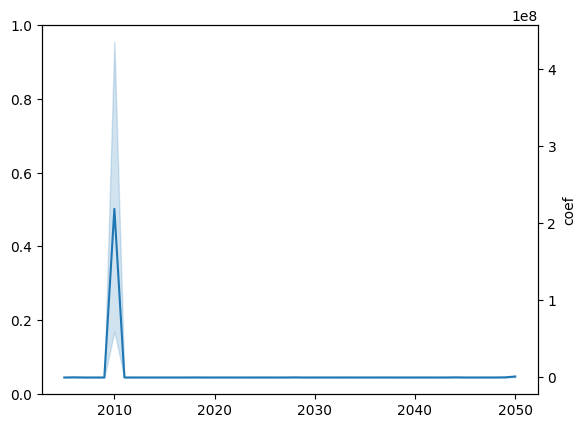

In [37]:
fig, ax = plt.subplots()

#sns.lineplot(data=df_melted, x='time', y='total_damage', hue='equation', legend=True, estimator='mean', ax=ax)
sns.lineplot(data=df_melted, x='time', y='coef', legend=True, estimator='mean', ax=ax.twinx())

plt.show()

## Preparing the regression

### With all variables, on a global level

In [7]:
# Group by time, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()
df_regression = df_regression.drop( columns=['REGIONS 35 I'])

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.apply(pd.to_numeric, errors='coerce')
df_regression = df_regression.dropna()


df_regression

,time,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,total_damage,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,2005.0,-1.622685,43669.143777,1.714491,7.141766e+04,False,False
1,2005.0,-1.622685,43669.143777,1.714491,8.627266e+04,True,False
2,2005.0,-1.622685,43669.143777,1.714491,1.457733e+05,False,True
3,2005.0,-1.296084,23150.826704,1.714491,7.141766e+04,False,False
4,2005.0,-1.296084,23150.826704,1.714491,8.627266e+04,True,False
...,...,...,...,...,...,...,...
2065,2050.0,1.735220,45073.380131,3.804644,4.862166e+06,True,False
2066,2050.0,1.735220,45073.380131,3.804644,8.405339e+06,False,True
2067,2050.0,2.605939,49273.708924,3.804644,6.889889e+06,False,False
2068,2050.0,2.605939,49273.708924,3.804644,4.862166e+06,True,False


## Checking some hypothesis on the dataset

We want to check the colinearity of our variables. To do so, we compute the correleation matrix, which computes two by two the correlation between multiple variables. We then represent it in the shape of a heatamp.

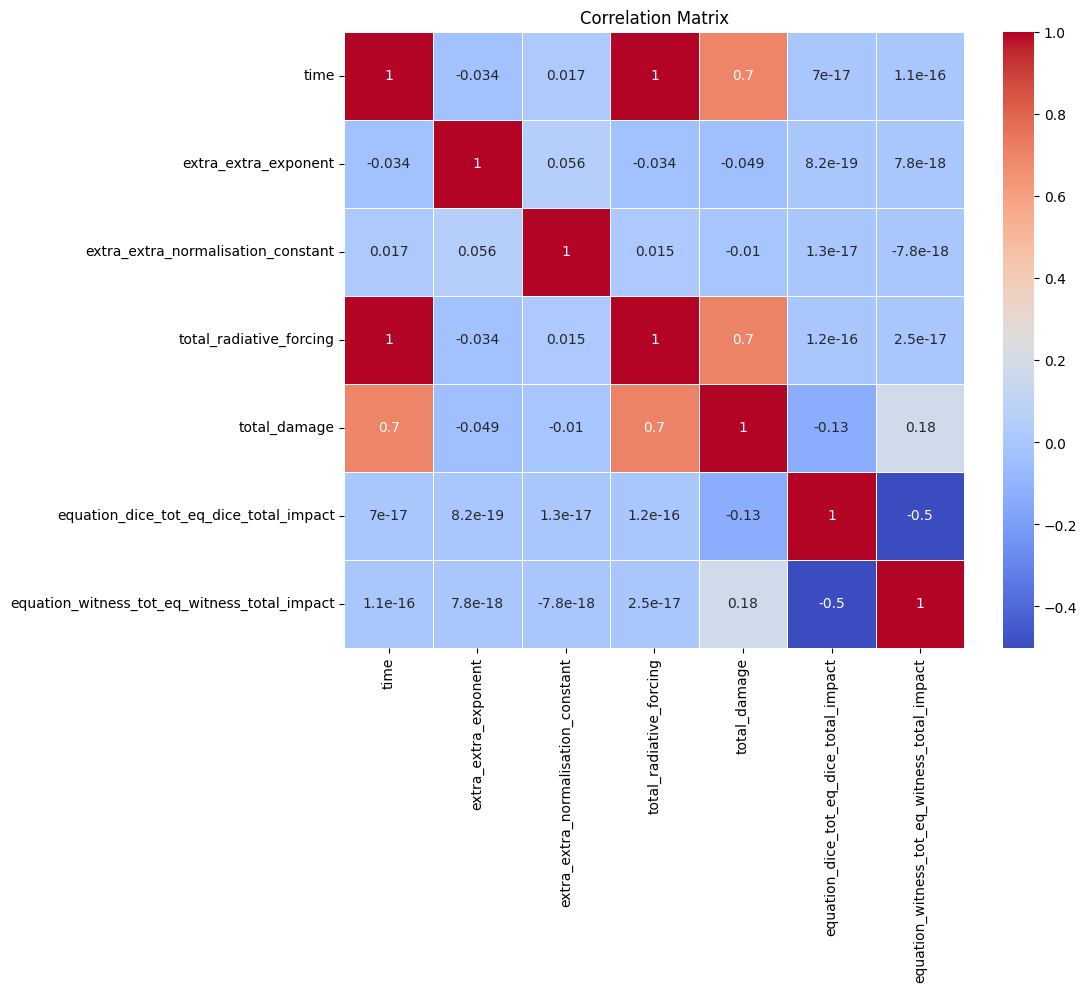

In [8]:
corr_matrix = df_regression.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We now want to visualize pair plots.

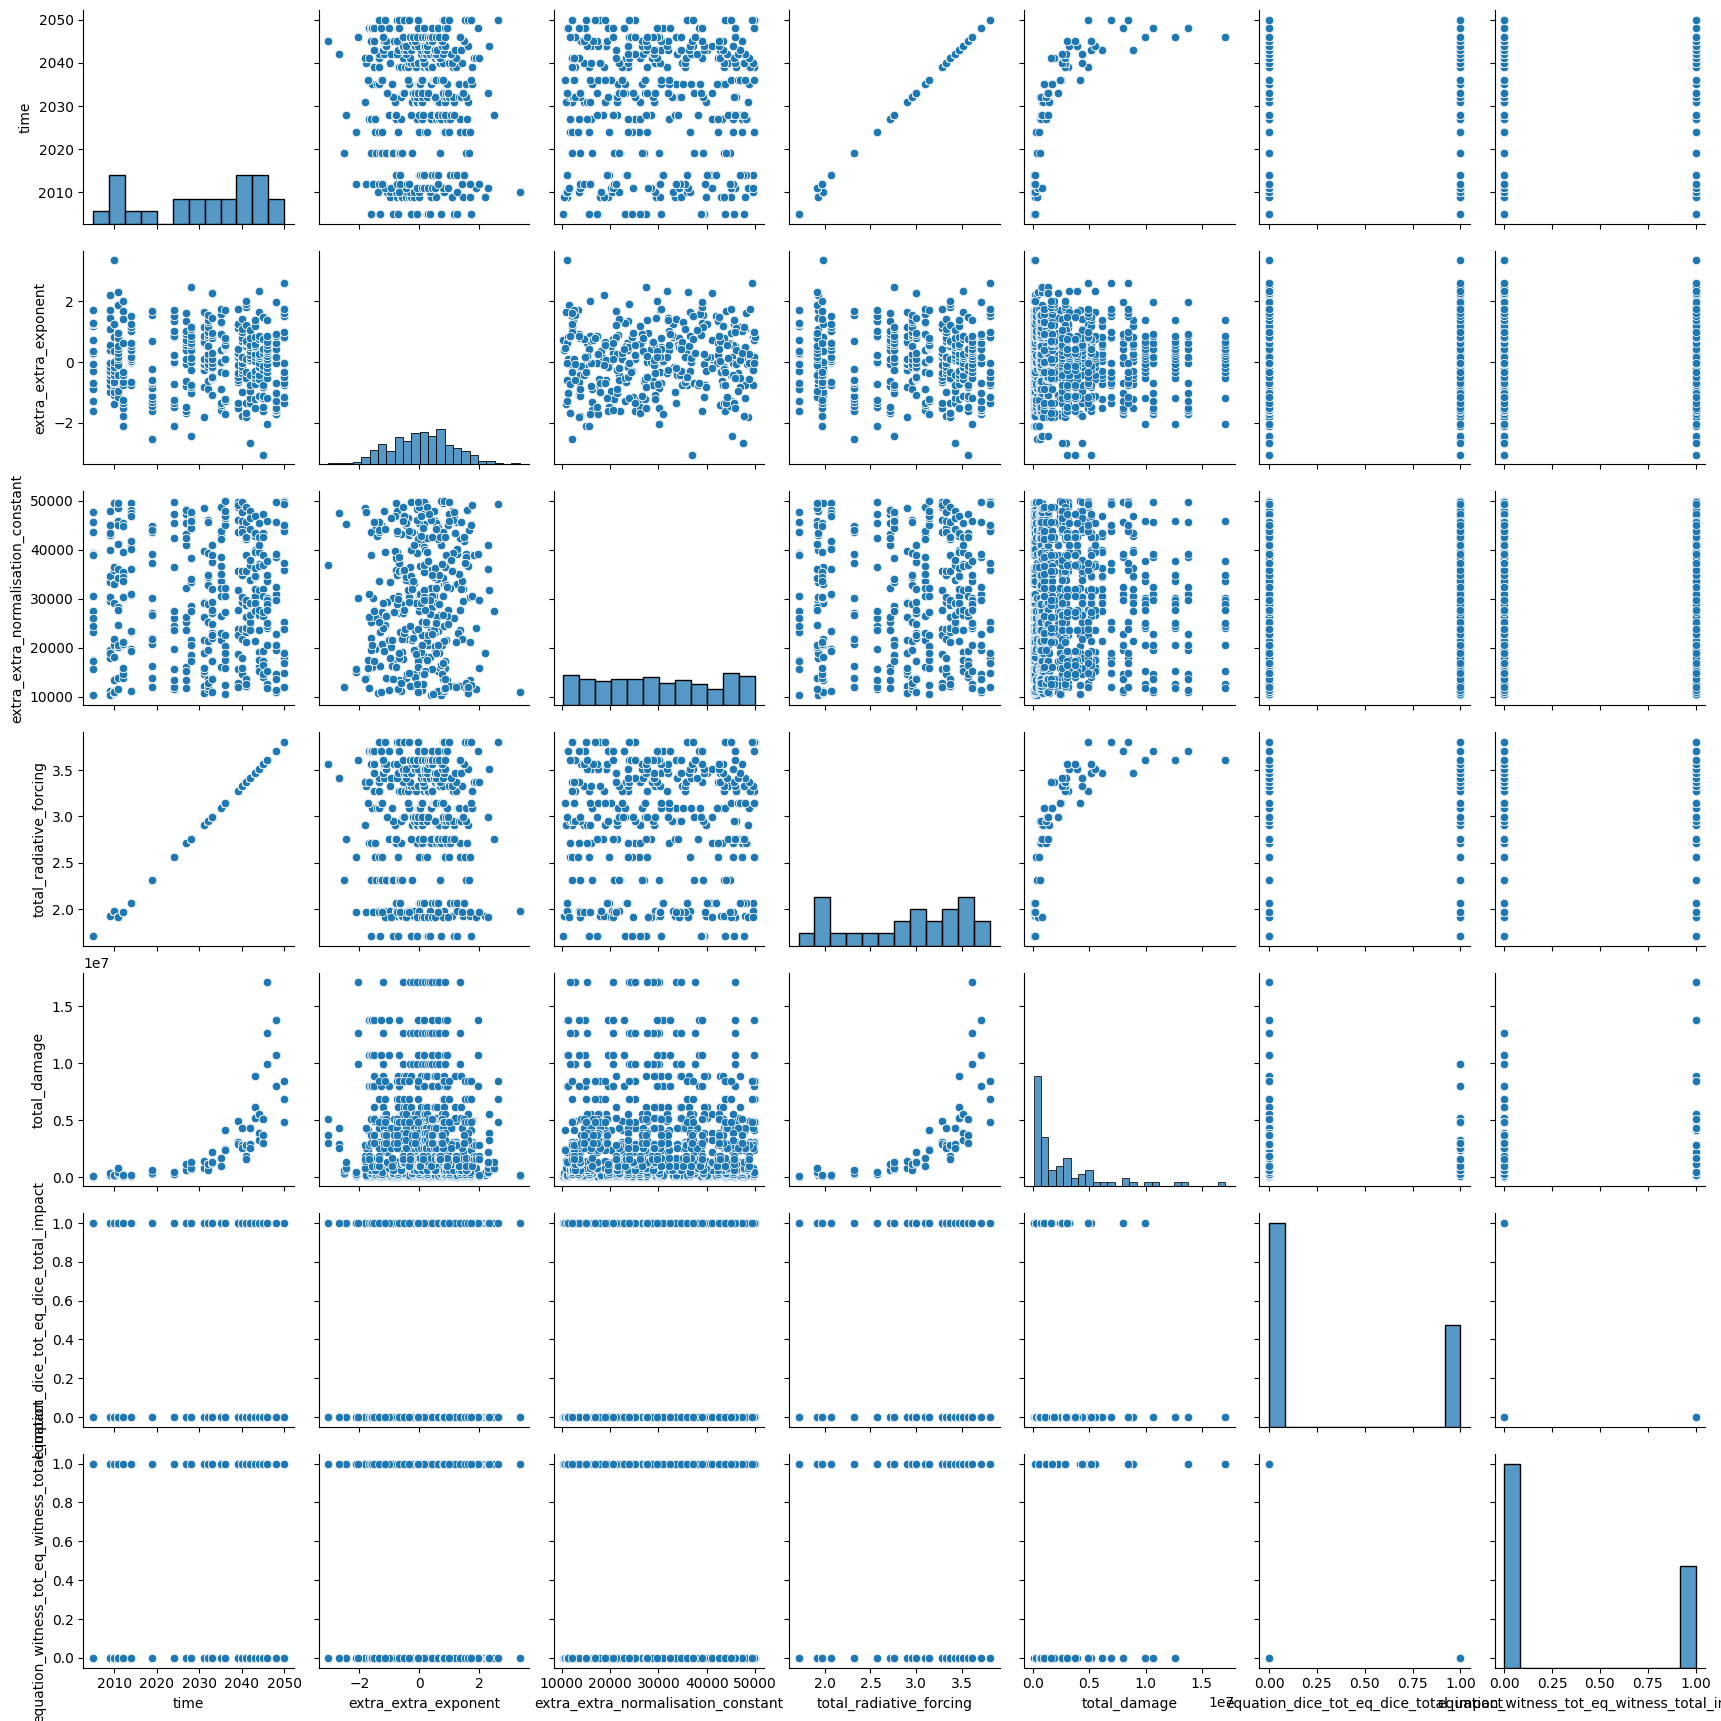

In [9]:
sns.pairplot(df_regression)

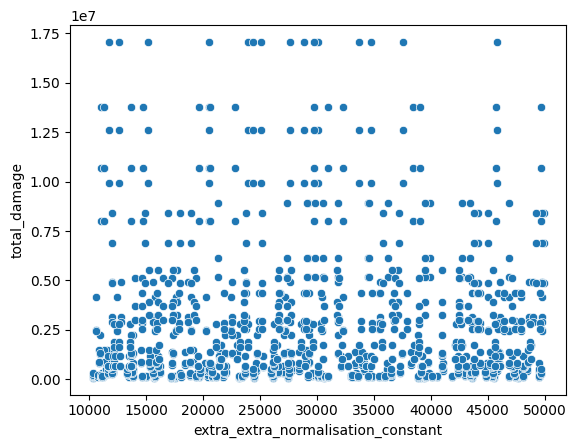

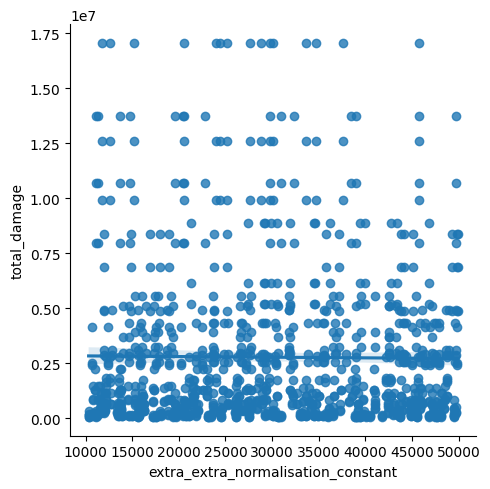

In [24]:
variable = 'extra_extra_normalisation_constant'

sns.scatterplot(data=df_regression, x=variable, y='total_damage')
sns.lmplot(data=df_regression, x=variable, y='total_damage', legend=True)

## Doing the regression

### Without the equation dummies

In [17]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
#df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=False)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage', 'REGIONS 35 I', 'equation'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:            total_damage   R-squared:                       0.496
Model:                             OLS   Adj. R-squared:                  0.494
Method:                  Least Squares   F-statistic:                     275.2
Date:              mer., 17 juil. 2024   Prob (F-statistic):          8.78e-165
Time:                         10:46:00   Log-Likelihood:                -18156.
No. Observations:                 1125   AIC:                         3.632e+04
Df Residuals:                     1120   BIC:                         3.635e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               6.203e+08   2.73e+08      2.272      0.023    8.45e+07    1.16e+09
time                               -3.191e+05   1.39e+05     -2.301      0.022   -5.91e+05    -4.7e+04
extra_extra_exponent               -8.572e+04   7.21e+04     -1.189      0.235   -2.27e+05    5.57e+04
extra_extra_normalisation_constant    -4.7212      6.226     -0.758      0.448     -16.937       7.494
total_radiative_forcing             1.062e+07   2.96e+06      3.587      0.000    4.81e+06    1.64e+07
==============================================================================
Omnibus:                      511.560   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2562.490
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                       9.068   Cond. No.                     1.19e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Without countries as dummy

In [14]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=False)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage', 'REGIONS 35 I'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:            total_damage   R-squared:                       0.530
Model:                             OLS   Adj. R-squared:                  0.527
Method:                  Least Squares   F-statistic:                     210.1
Date:              mer., 17 juil. 2024   Prob (F-statistic):          2.41e-179
Time:                         10:42:45   Log-Likelihood:                -18116.
No. Observations:                 1125   AIC:                         3.625e+04
Df Residuals:                     1118   BIC:                         3.628e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         4.652e+08   1.98e+08      2.351      0.019    7.69e+07    8.54e+08
time                                         -3.191e+05   1.34e+05     -2.381      0.017   -5.82e+05   -5.62e+04
extra_extra_exponent                         -8.572e+04   6.97e+04     -1.231      0.219   -2.22e+05    5.09e+04
extra_extra_normalisation_constant              -4.7212      6.016     -0.785      0.433     -16.526       7.083
total_radiative_forcing                       1.062e+07   2.86e+06      3.712      0.000    5.01e+06    1.62e+07
equation_define_tot_eq_define_total_impact    1.549e+08    6.6e+07      2.347      0.019    2.54e+07    2.84e+08
equation_dice_tot_eq_dice_total_impact        1.544e+08    6.6e+07      2.341      0.019     2.5e+07    2.84e+08
equation_witness_tot_eq_witness_total_impact   1.56e+08    6.6e+07      2.364      0.018    2.65e+07    2.85e+08
==============================================================================
Omnibus:                      473.451   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1985.581
Skew:                           2.006   Prob(JB):                         0.00
Kurtosis:                       8.125   Cond. No.                     2.25e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
df_regression

,time,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,REGIONS 35 I,total_damage,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,2005.0,-1.622685,43669.143777,1.714491,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,7.141766e+04,False,False
1,2005.0,-1.622685,43669.143777,1.714491,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,8.627266e+04,True,False
2,2005.0,-1.622685,43669.143777,1.714491,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,1.457733e+05,False,True
3,2005.0,-1.296084,23150.826704,1.714491,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,7.141766e+04,False,False
4,2005.0,-1.296084,23150.826704,1.714491,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,8.627266e+04,True,False
...,...,...,...,...,...,...,...,...
2065,2050.0,1.735220,45073.380131,3.804644,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,4.862166e+06,True,False
2066,2050.0,1.735220,45073.380131,3.804644,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,8.405339e+06,False,True
2067,2050.0,2.605939,49273.708924,3.804644,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,6.889889e+06,False,False
2068,2050.0,2.605939,49273.708924,3.804644,AUSTRIABELGIUMBULGARIACROATIACYPRUSCZECH REPUB...,4.862166e+06,True,False


### With countries as dummy

In [10]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation', 'REGIONS 35 I'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     109.9
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:26   Log-Likelihood:            -1.1236e+06
No. Observations:               66780   AIC:                         2.247e+06
Df Residuals:                   66739   BIC:                         2.248e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                        -1.716e+08   6.99e+07     -2.454      0.014   -3.09e+08   -3.45e+07
time                                          8.668e+04   3.55e+04      2.441      0.015    1.71e+04    1.56e+05
extra_extra_exponent                         -1691.2780    1.9e+04     -0.089      0.929   -3.89e+04    3.55e+04
extra_extra_normalisation_constant              -0.1079      1.603     -0.067      0.946      -3.250       3.035
total_radiative_forcing                      -1.555e+06   7.58e+05     -2.051      0.040   -3.04e+06   -6.92e+04
equation_dice_tot_eq_dice_total_impact       -1.885e+04   4.66e+04     -0.405      0.685    -1.1e+05    7.24e+04
equation_witness_tot_eq_witness_total_impact   1.89e+05   4.66e+04      4.059      0.000    9.77e+04     2.8e+05
REGIONS 35 I_BELGIUM                          6.049e+04   1.82e+05      0.332      0.740   -2.96e+05    4.17e+05
REGIONS 35 I_BULGARIA                         4.396e+04   1.82e+05      0.242      0.809   -3.13e+05    4.01e+05
REGIONS 35 I_CHINA                            7.884e+05   1.82e+05      4.333      0.000    4.32e+05    1.15e+06
REGIONS 35 I_CROATIA                          4.127e+04   1.82e+05      0.227      0.821   -3.15e+05    3.98e+05
REGIONS 35 I_CYPRUS                           3.967e+04   1.82e+05      0.218      0.827   -3.17e+05    3.96e+05
REGIONS 35 I_CZECH REPUBLIC                   4.505e+04   1.82e+05      0.248      0.804   -3.12e+05    4.02e+05
REGIONS 35 I_DENMARK                           5.17e+04   1.82e+05      0.284      0.776   -3.05e+05    4.08e+05
REGIONS 35 I_EASOC                            4.317e+05   1.82e+05      2.372      0.018     7.5e+04    7.88e+05
REGIONS 35 I_ESTONIA                           3.99e+04   1.82e+05      0.219      0.826   -3.17e+05    3.97e+05
REGIONS 35 I_FINLAND                           4.68e+04   1.82e+05      0.257      0.797    -3.1e+05    4.03e+05
REGIONS 35 I_FRANCE                           9.685e+04   1.82e+05      0.532      0.595    -2.6e+05    4.54e+05
REGIONS 35 I_GERMANY                          3.449e+05   1.82e+05      1.895      0.058   -1.18e+04    7.02e+05
REGIONS 35 I_GREECE                           4.403e+04   1.82e+05      0.242      0.809   -3.13e+05    4.01e+05
REGIONS 35 I_HUNGARY                          4.491e+04   1.82e+05      0.247      0.805   -3.12e+05    4.02e+05
REGIONS 35 I_INDIA                            6.893e+06   1.82e+05     37.880      0.000    6.54e+06    7.25e+06
REGIONS 35 I_IRELAND                           4.46e+04   1.82e+05      0.245      0.806   -3.12e+05    4.01e+05
REGIONS 35 I_ITALY                            4.505e-06   2.07e+05   2.18e-11      1.000   -4.06e+05    4.06e+05
REGIONS 35 I_LATAM              